In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import temp_crt

plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.constrained_layout.use'] = True

# py.offline.init_notebook_mode(connected=True)

In [6]:
# parse the letter 'D' (mocap data)
traj = temp_crt.parse_trajectory("D")
strokes = traj[0]
#print(strokes)
t = strokes[0]
x = strokes[1]
y = strokes[2]
stroke1 = strokes[:, 0:31]  # Y = -0.34639319
np.savetxt("stroke1.csv", np.transpose(stroke1), delimiter=",")
stroke2 = strokes[:, 31:57] # X = 0.74592703
np.savetxt("stroke2.csv", np.transpose(stroke2), delimiter=",")
stroke3 = strokes[:, 57::] # to end
np.savetxt("stroke3.csv", np.transpose(stroke3), delimiter=",")
#print(np.transpose(stroke1))
#print(" ")
#print(np.transpose(stroke2))
#print(" ")
#print(np.transpose(stroke3))

stroke1_nt = np.array([x[0:31],y[0:31]])
t_nt = t[0:31]
#print(stroke1_nt)
velocity = np.sqrt(np.sum((np.gradient(strokes, axis=1)/0.008333)**2,
                                  axis=0))
#print(velocity)

# Import csv file (gtsam result)
columns = ["time", "x", "y"]
gt1 = pd.read_csv("../build/cpp/SLM/tests/stroke1_gtsam.csv", usecols=columns)
t_gt1 = gt1.time.tolist()
x_gt1 = gt1.x.tolist()
y_gt1 = gt1.y.tolist()
v_gt1 = np.sqrt(np.sum((np.gradient(np.array([x_gt1,y_gt1]), axis=1)/(1/120/2))**2,
                                  axis=0))
gt2 = pd.read_csv("../build/cpp/SLM/tests/stroke2_gtsam.csv", usecols=columns)
t_gt2 = gt2.time.tolist()
x_gt2 = gt2.x.tolist()
y_gt2 = gt2.y.tolist()
v_gt2 = np.sqrt(np.sum((np.gradient(np.array([x_gt2,y_gt2]), axis=1)/(1/120/2))**2,
                                  axis=0))

# gt3 = pd.read_csv("../build/cpp/SLM/tests/stroke3_gtsam.csv", usecols=columns)
# t_gt3 = gt3.time.tolist()
# x_gt3 = gt3.x.tolist()
# y_gt3 = gt3.y.tolist()
# v_gt3 = np.sqrt(np.sum((np.gradient(np.array([x_gt3,y_gt3]), axis=1)/(1/120/2))**2,
#                                   axis=0))

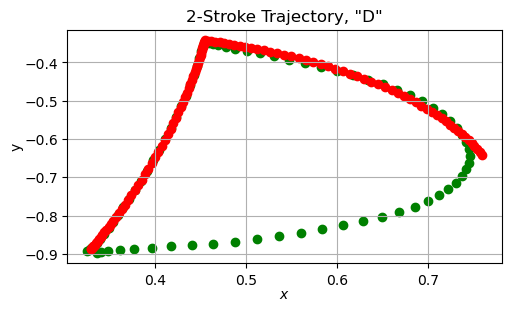

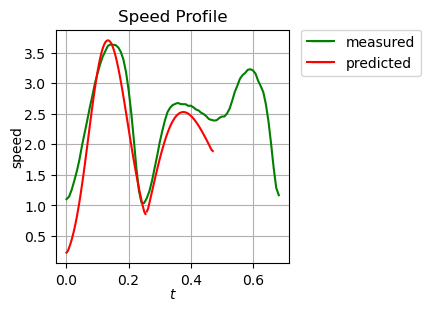

In [7]:
# Plotting
blk_ln = mlines.Line2D([], [], color='black', marker='_',
                       markersize=15, label='measured')
green_pt = mlines.Line2D([], [], color='green', marker='_',
                         markersize=15, label='measured')
red_pt = mlines.Line2D([], [], color='red', marker='_',
                       markersize=15, label='predicted')
yellow_ln = mlines.Line2D([], [], color='yellow', marker='_',
                          markersize=15, label='error')

fig, ax = plt.subplots()
plt.title('2-Stroke Trajectory, "D"')
plt.grid(visible=1)
plt.scatter(x, y, c='g')
plt.scatter(x_gt1, y_gt1, c='r')
plt.scatter(x_gt2, y_gt2, c='r')
#plt.scatter(x_gt3, y_gt3, c='b')
#plt.scatter(xre, yre, c='r')
plt.xlabel('$x$', labelpad=0)
plt.ylabel('y', labelpad=0)

fig, ax = plt.subplots()
plt.title('Speed Profile')
plt.grid(visible=1)
# for i, s in enumerate(strokes):
#     plt.fill_between(t, 0, s, where=s > 0, facecolor='grey', alpha=0.5)
#plt.plot(t_nt, velocity, 'g')
plt.plot(t, velocity, 'g')
plt.plot(t_gt1, v_gt1, 'r')
plt.plot(t_gt2, v_gt2, 'r')
# plt.plot(t_gt3, v_gt3, 'b')
# plt.scatter(tm, v, c='g')
# plt.scatter(tm, V, c='r')
# for i in range(len(px)):
#     lineXdata = (tm[i], tm[i])  # same X
#     lineYdata = (v[i], V[i])  # different Y
#     plt.plot(lineXdata, lineYdata, c='y')
plt.xlabel('$t$', labelpad=0)
plt.ylabel('speed', labelpad=0)
ax.set_box_aspect(1)
plt.legend(handles=[green_pt, red_pt],
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [8]:
# plt.scatter(px, py, c='g')
# plt.scatter(Xx, Xy, c='r')
# for i in range(len(px)):
#     lineXdata = (px[i], px[i])  # same X
#     lineYdata = (py[i], Xy[i])  # different Y
#     plt.plot(lineXdata, lineYdata, c='y')
# plt.xlabel('$x$', labelpad=0)
# plt.ylabel('y', labelpad=0)
# ax.set_box_aspect(1)
# plt.legend(handles=[blk_ln, green_pt, red_pt],
#            bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# fig, axs = plt.subplots(2, sharex=True)
# fig.suptitle('X and Y vs Time')
# axs[0].grid()
# axs[0].scatter(tm, px, c='g')
# axs[0].scatter(tm, Xx, c='r')
# for i in range(len(px)):
#     lineXdata = (tm[i], tm[i])  # same X
#     lineYdata = (px[i], Xx[i])  # different Y
#     axs[0].plot(lineXdata, lineYdata, c='y')
# axs[0].set(xlabel='$t$', ylabel='x')
# axs[1].grid()
# axs[1].scatter(tm, py, c='g')
# axs[1].scatter(tm, Xy, c='r')
# for i in range(len(py)):
#     lineXdata = (tm[i], tm[i])  # same X
#     lineYdata = (py[i], Xy[i])  # different Y
#     axs[1].plot(lineXdata, lineYdata, c='y')
# axs[1].set(xlabel='$t$', ylabel='y')
# plt.legend(handles=[green_pt, red_pt, yellow_ln],
#            loc='right')

# fig, ax = plt.subplots()
# plt.title('Speed Profile')
# plt.grid(visible=1)
# for i, s in enumerate(strokes):
#     plt.fill_between(t, 0, s, where=s > 0, facecolor='grey', alpha=0.5)
# plt.plot(t, velocity, 'k')
# plt.scatter(tm, v, c='g')
# plt.scatter(tm, V, c='r')
# for i in range(len(px)):
#     lineXdata = (tm[i], tm[i])  # same X
#     lineYdata = (v[i], V[i])  # different Y
#     plt.plot(lineXdata, lineYdata, c='y')
# plt.xlabel('$t$', labelpad=0)
# plt.ylabel('speed', labelpad=0)
# ax.set_box_aspect(1)
# plt.legend(handles=[blk_ln, green_pt, red_pt, yellow_ln],
#            bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)